<a href="https://colab.research.google.com/github/Jenn-mawia/AHU-Fault-detection/blob/main/AHU_FaultDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
# data manipulation/processing
import pandas as pd
# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing/scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [ ]:
data = pd.read_csv("MZVAV-2-1.csv")

# Checking the data

In [ ]:
# number of rows and columns in the data
data.shape

(21600, 19)

>There are 21600 data points in the data with 19 columns

In [ ]:
# check the top of the dataset
data.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,75.92,55,80.61,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,8/28/2007 0:01,75.71,55,80.68,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,8/28/2007 0:02,75.71,55,80.66,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
3,8/28/2007 0:03,75.60,55,80.69,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
4,8/28/2007 0:04,75.81,55,80.60,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1


In [ ]:
# check the bottom of the dataset
data.tail()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
21595,5/31/2009 23:55,66.88,55,67.31,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21596,5/31/2009 23:56,66.77,55,67.29,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21597,5/31/2009 23:57,66.88,55,67.23,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21598,5/31/2009 23:58,66.99,55,67.21,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21599,5/31/2009 23:59,66.99,55,67.18,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0


In [ ]:
# check the datatypes of the data
data.dtypes

Datetime                                           object
AHU: Supply Air Temperature                       float64
AHU: Supply Air Temperature Set Point               int64
AHU: Outdoor Air Temperature                      float64
AHU: Mixed Air Temperature                        float64
AHU: Return Air Temperature                       float64
AHU: Supply Air Fan Status                          int64
AHU: Return Air Fan Status                          int64
AHU: Supply Air Fan Speed Control Signal          float64
AHU: Return Air Fan Speed Control Signal          float64
AHU: Exhaust Air Damper Control Signal            float64
AHU: Outdoor Air Damper Control Signal            float64
AHU: Return Air Damper Control Signal             float64
AHU: Cooling Coil Valve Control Signal            float64
AHU: Heating Coil Valve Control Signal            float64
AHU: Supply Air Duct Static Pressure Set Point    float64
AHU: Supply Air Duct Static Pressure              float64
Occupancy Mode

>The data consists of numeric data represented as either integer or float for values taking decimal points. The Datetime column is represented as a string which needs to be changed to Datetime datatype during data cleaning. 


# **Data Cleaning**

## **Datatype Conversion**

In [ ]:
# convert the datatype of the Datetime column 
data['Datetime'] = pd.to_datetime(data['Datetime'])

# check changes made on the Datetime column
data.dtypes

Datetime                                          datetime64[ns]
AHU: Supply Air Temperature                              float64
AHU: Supply Air Temperature Set Point                      int64
AHU: Outdoor Air Temperature                             float64
AHU: Mixed Air Temperature                               float64
AHU: Return Air Temperature                              float64
AHU: Supply Air Fan Status                                 int64
AHU: Return Air Fan Status                                 int64
AHU: Supply Air Fan Speed Control Signal                 float64
AHU: Return Air Fan Speed Control Signal                 float64
AHU: Exhaust Air Damper Control Signal                   float64
AHU: Outdoor Air Damper Control Signal                   float64
AHU: Return Air Damper Control Signal                    float64
AHU: Cooling Coil Valve Control Signal                   float64
AHU: Heating Coil Valve Control Signal                   float64
AHU: Supply Air Duct Stat

## **Uniformity**

In [ ]:
# fixing messy column names and ensuring they are in same format using strip(), lower(), replace() functions
data.columns = data.columns.str.strip().str.replace('AHU: ', '').str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# preview column names to see changes made
print(data.columns)

Index(['datetime', 'supply_air_temperature',
       'supply_air_temperature_set_point', 'outdoor_air_temperature',
       'mixed_air_temperature', 'return_air_temperature',
       'supply_air_fan_status', 'return_air_fan_status',
       'supply_air_fan_speed_control_signal',
       'return_air_fan_speed_control_signal',
       'exhaust_air_damper_control_signal',
       'outdoor_air_damper_control_signal', 'return_air_damper_control_signal',
       'cooling_coil_valve_control_signal',
       'heating_coil_valve_control_signal',
       'supply_air_duct_static_pressure_set_point',
       'supply_air_duct_static_pressure', 'occupancy_mode_indicator',
       'fault_detection_ground_truth'],
      dtype='object')


## **Missing Values**

In [ ]:
# check for missing data
data.isnull().sum()

datetime                                     0
supply_air_temperature                       0
supply_air_temperature_set_point             0
outdoor_air_temperature                      0
mixed_air_temperature                        0
return_air_temperature                       0
supply_air_fan_status                        0
return_air_fan_status                        0
supply_air_fan_speed_control_signal          0
return_air_fan_speed_control_signal          0
exhaust_air_damper_control_signal            0
outdoor_air_damper_control_signal            0
return_air_damper_control_signal             0
cooling_coil_valve_control_signal            0
heating_coil_valve_control_signal            0
supply_air_duct_static_pressure_set_point    0
supply_air_duct_static_pressure              0
occupancy_mode_indicator                     0
fault_detection_ground_truth                 0
dtype: int64

>There is no missing data in any of the columns

## **Duplicate Entries**

In [ ]:
# check for duplicate entries
data.duplicated().sum()

0

>There are no duplicated entries in the data

## **Checking for Outliers**

In [ ]:
data.columns

Index(['datetime', 'supply_air_temperature',
       'supply_air_temperature_set_point', 'outdoor_air_temperature',
       'mixed_air_temperature', 'return_air_temperature',
       'supply_air_fan_status', 'return_air_fan_status',
       'supply_air_fan_speed_control_signal',
       'return_air_fan_speed_control_signal',
       'exhaust_air_damper_control_signal',
       'outdoor_air_damper_control_signal', 'return_air_damper_control_signal',
       'cooling_coil_valve_control_signal',
       'heating_coil_valve_control_signal',
       'supply_air_duct_static_pressure_set_point',
       'supply_air_duct_static_pressure', 'occupancy_mode_indicator',
       'fault_detection_ground_truth'],
      dtype='object')

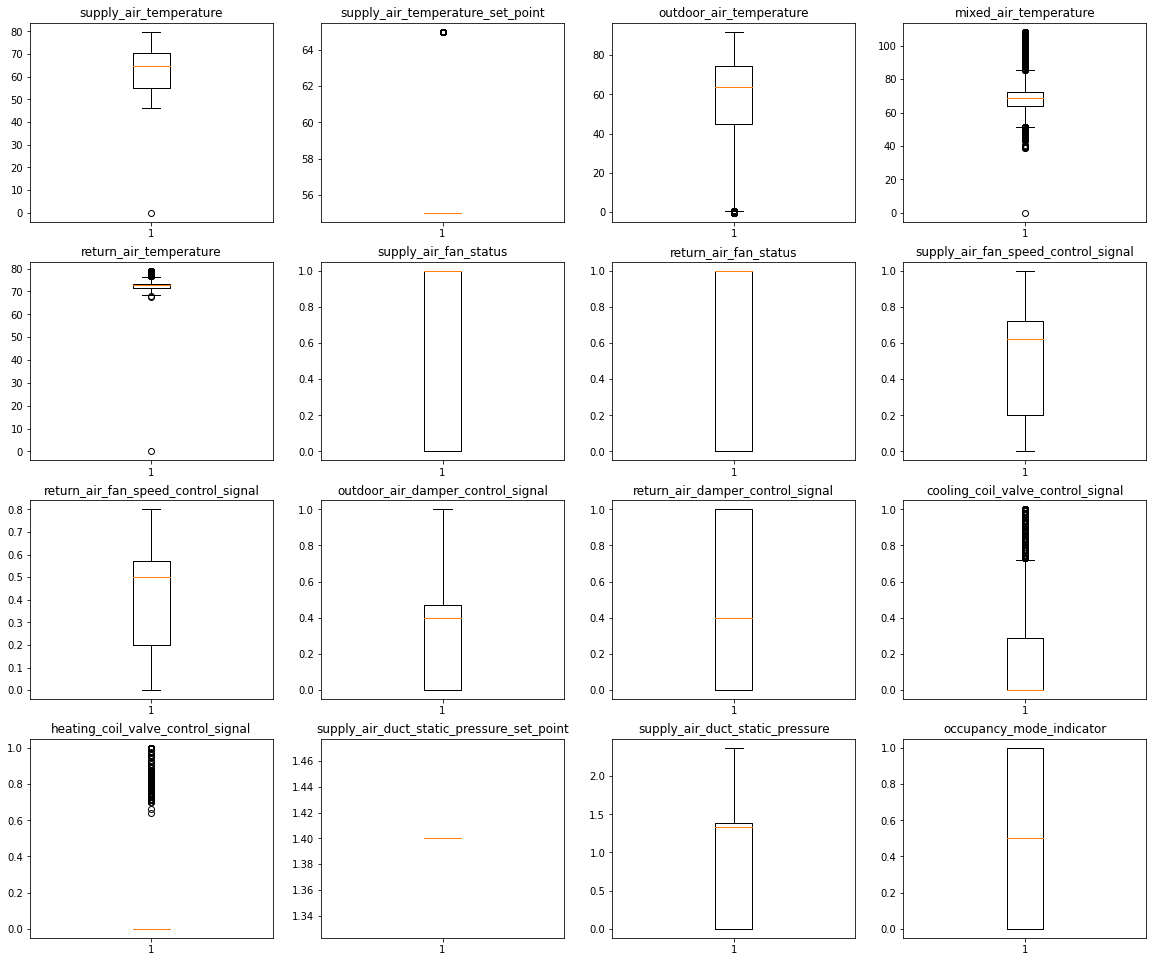

In [ ]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'supply_air_temperature':1, 'supply_air_temperature_set_point':2, 
                'outdoor_air_temperature':3, 'mixed_air_temperature':4, 'return_air_temperature':5, 
                'supply_air_fan_status':6, 'return_air_fan_status':7, 'supply_air_fan_speed_control_signal':8, 
                'return_air_fan_speed_control_signal':9, 'outdoor_air_damper_control_signal':10,
                'return_air_damper_control_signal':11, 'cooling_coil_valve_control_signal':12, 
                'heating_coil_valve_control_signal':13, 'supply_air_duct_static_pressure_set_point':14, 
                'supply_air_duct_static_pressure':15, 'occupancy_mode_indicator':16}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

>There are alot of outliers in the datapoints especially in the continuos variables. Most of these variables are temperature data points and hence it is normal that on some days, temperature will be extremely high or extremely low compared to other normal days, hence causing the many outliers. Therefore, we will not remove these outliers. 

# EXPLORATORY DATA ANALYSIS

## **Univariate Analysis**

**Histogram plots**

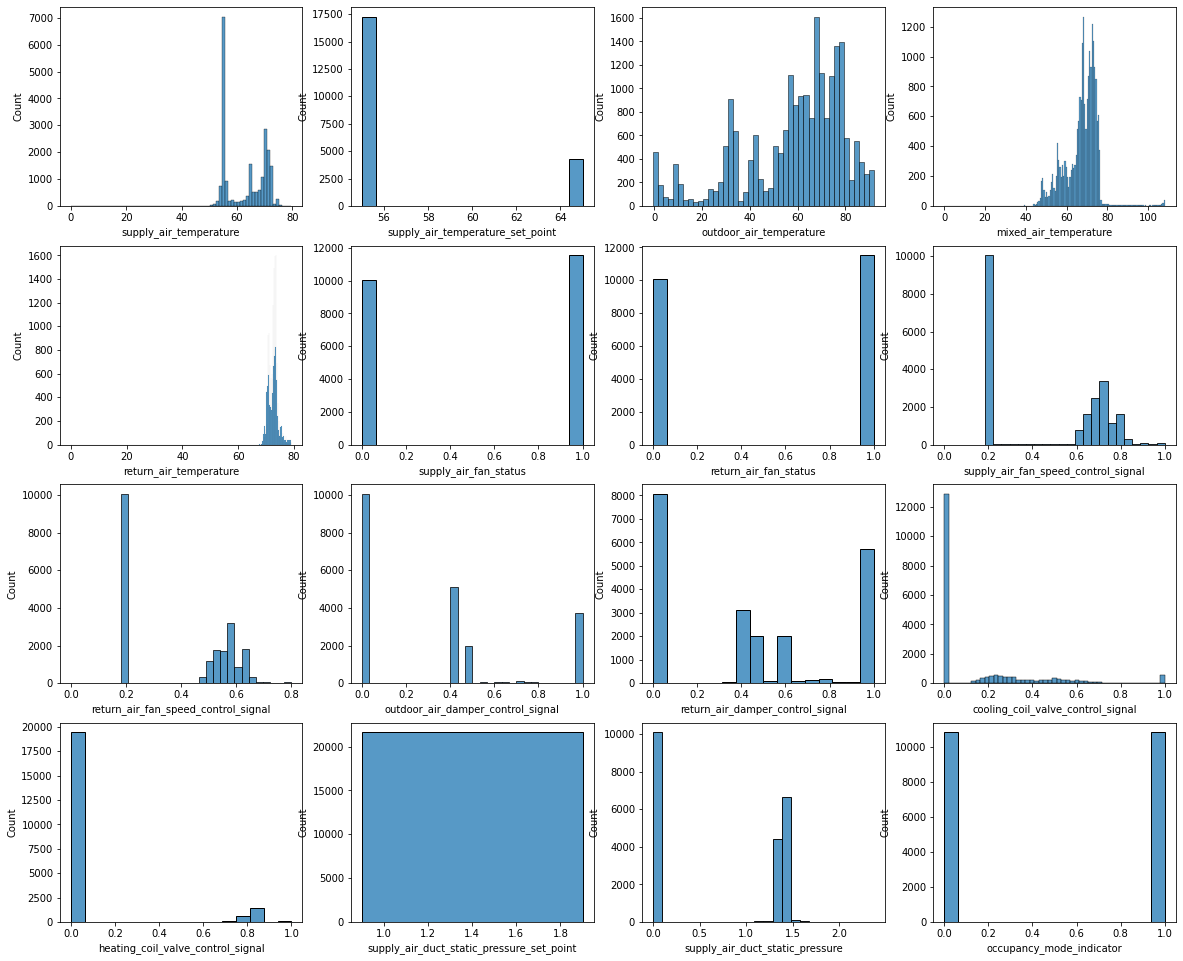

In [ ]:
# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  sns.histplot(data[variable])

plt.show()

>The "outdoor_air_temperature" data assumes the shape of a normal curve slightly skewed to the left. 

>The "supply_air_temperature", "mixed_air_temperature", "return_air_temperature", "supply_air_fan_speed_control_signal" and "return_air_fan_speed_control_signal" have varying datapoints as seen in the histogram plots. 

>The "supply_air_temperature_set_point" and "supply_air_duct_static_pressure_set_point" are both constant values set for 55.04 and 0.04 respectively. 

>The rest of the data is categorical in nature and can be seen in the bar plots.

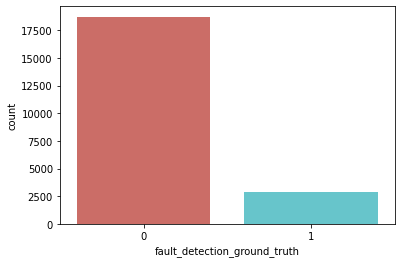

In [ ]:
# plot the distribution of the target variable
sns.countplot(x='fault_detection_ground_truth',data=data, palette='hls')


There is a huge imbalance in the dataset, since class 1(faults detected) exceed class 0(no faults) by a very huge number. This needs to be dealt with before building a machine learning model, otherwise the models will not perform well.



**Measures of central tendency**

In [ ]:
# compute the mean of the numeric columns in the data
data.mean()

supply_air_temperature                       62.996525
supply_air_temperature_set_point             57.000463
outdoor_air_temperature                      58.220122
mixed_air_temperature                        67.488618
return_air_temperature                       72.611413
supply_air_fan_status                         0.534722
return_air_fan_status                         0.533611
supply_air_fan_speed_control_signal           0.474657
return_air_fan_speed_control_signal           0.398145
exhaust_air_damper_control_signal             0.341757
outdoor_air_damper_control_signal             0.331989
return_air_damper_control_signal              0.443025
cooling_coil_valve_control_signal             0.168748
heating_coil_valve_control_signal             0.083330
supply_air_duct_static_pressure_set_point     1.400000
supply_air_duct_static_pressure               0.738494
occupancy_mode_indicator                      0.500000
fault_detection_ground_truth                  0.133333
dtype: flo

In [ ]:
# compute the median of the columns in the data
data.median()


supply_air_temperature                       64.84
supply_air_temperature_set_point             55.00
outdoor_air_temperature                      63.64
mixed_air_temperature                        68.66
return_air_temperature                       72.81
supply_air_fan_status                         1.00
return_air_fan_status                         1.00
supply_air_fan_speed_control_signal           0.62
return_air_fan_speed_control_signal           0.50
exhaust_air_damper_control_signal             0.40
outdoor_air_damper_control_signal             0.40
return_air_damper_control_signal              0.40
cooling_coil_valve_control_signal             0.00
heating_coil_valve_control_signal             0.00
supply_air_duct_static_pressure_set_point     1.40
supply_air_duct_static_pressure               1.34
occupancy_mode_indicator                      0.50
fault_detection_ground_truth                  0.00
dtype: float64

In [ ]:
# compute the mode of the numeric columns in the data

# remove date column from the data
mode_data = data.drop("datetime", axis=1)
# compute the mode
mode_data.mode()


,supply_air_temperature,supply_air_temperature_set_point,outdoor_air_temperature,mixed_air_temperature,return_air_temperature,supply_air_fan_status,return_air_fan_status,supply_air_fan_speed_control_signal,return_air_fan_speed_control_signal,exhaust_air_damper_control_signal,outdoor_air_damper_control_signal,return_air_damper_control_signal,cooling_coil_valve_control_signal,heating_coil_valve_control_signal,supply_air_duct_static_pressure_set_point,supply_air_duct_static_pressure,occupancy_mode_indicator,fault_detection_ground_truth
0,55.04,55.0,68.83,72.38,73.55,1.0,1.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


**Measures of dispersion**

In [ ]:
# # find the standard deviations, quantiles, min and max values

# summary statistics of the data
data.describe()

,supply_air_temperature,supply_air_temperature_set_point,outdoor_air_temperature,mixed_air_temperature,return_air_temperature,supply_air_fan_status,return_air_fan_status,supply_air_fan_speed_control_signal,return_air_fan_speed_control_signal,exhaust_air_damper_control_signal,outdoor_air_damper_control_signal,return_air_damper_control_signal,cooling_coil_valve_control_signal,heating_coil_valve_control_signal,supply_air_duct_static_pressure_set_point,supply_air_duct_static_pressure,occupancy_mode_indicator,fault_detection_ground_truth
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000
mean,62.996525,57.000463,58.220122,67.488618,72.611413,0.534722,0.533611,0.474657,0.398145,0.341757,0.331989,0.443025,0.168748,0.083330,1.400000e+00,0.738494,0.500000,0.133333
std,7.372700,4.000440,21.458405,7.875141,1.679548,0.498804,0.498881,0.261236,0.189342,0.372642,0.368341,0.400821,0.252140,0.249985,5.278122e-13,0.695622,0.500012,0.339943
min,0.000000,55.000000,-0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+00,0.000000,0.000000,0.000000
25%,55.150000,55.000000,44.980000,64.100000,71.340000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+00,0.000000,0.000000,0.000000
50%,64.840000,55.000000,63.640000,68.660000,72.810000,1.000000,1.000000,0.620000,0.500000,0.400000,0.400000,0.400000,0.000000,0.000000,1.400000e+00,1.340000,0.500000,0.000000
75%,70.430000,55.000000,74.550000,72.590000,73.440000,1.000000,1.000000,0.720000,0.570000,0.470000,0.470000,1.000000,0.290000,0.000000,1.400000e+00,1.390000,1.000000,0.000000
max,79.690000,65.000000,91.850000,108.240000,79.120000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+00,2.370000,1.000000,1.000000


In [ ]:
# compute the variance for each variable
var = data.var()
var1 = pd.DataFrame()
var1['variance'] = var
var1.sort_values(by='variance', ascending=False)


,variance
outdoor_air_temperature,4.604631e+02
mixed_air_temperature,6.201785e+01
supply_air_temperature,5.435670e+01
supply_air_temperature_set_point,1.600352e+01
return_air_temperature,2.820882e+00
supply_air_duct_static_pressure,4.838905e-01
occupancy_mode_indicator,2.500116e-01
return_air_fan_status,2.488818e-01
supply_air_fan_status,2.488059e-01
return_air_damper_control_signal,1.606575e-01


>Columns with higher variances are the non-categorical columns which comprises of mostly continuos temprature data while categorical columns have lower variances


>The constant set values have the least variances since these values remain all through each datapoint


In [ ]:
# compute the skewness for each variable
data.skew()

supply_air_temperature                      -0.023524
supply_air_temperature_set_point             1.499743
outdoor_air_temperature                     -0.954179
mixed_air_temperature                       -0.103922
return_air_temperature                      -3.262047
supply_air_fan_status                       -0.139235
return_air_fan_status                       -0.134759
supply_air_fan_speed_control_signal         -0.030866
return_air_fan_speed_control_signal         -0.009012
exhaust_air_damper_control_signal            0.692043
outdoor_air_damper_control_signal            0.732597
return_air_damper_control_signal             0.224242
cooling_coil_valve_control_signal            1.540708
heating_coil_valve_control_signal            2.683261
supply_air_duct_static_pressure_set_point    0.000000
supply_air_duct_static_pressure             -0.108351
occupancy_mode_indicator                     0.000000
fault_detection_ground_truth                 2.157427
dtype: float64

>"outdoor_air_temperature", "mixed_air_temperature", "return_air_temperature", "supply_air_fan_status", "return_air_fan_status","supply_air_fan_speed_control_signal", "return_air_fan_speed_control_signal" and "fault_detection_ground_truth" are negatively skewed while the other fields are positively skewed.

## **Bivariate Analysis**

>Since there are alot of columns in the data, it would not be visually applealing to plot scatter charts for all the variables. Therefore, a correlation plot will be the best to show correlations between the columns

In [ ]:
# remove the target variable and the datetime column
bivariate_plot_data = data.drop(['datetime', 'fault_detection_ground_truth'], axis=1)

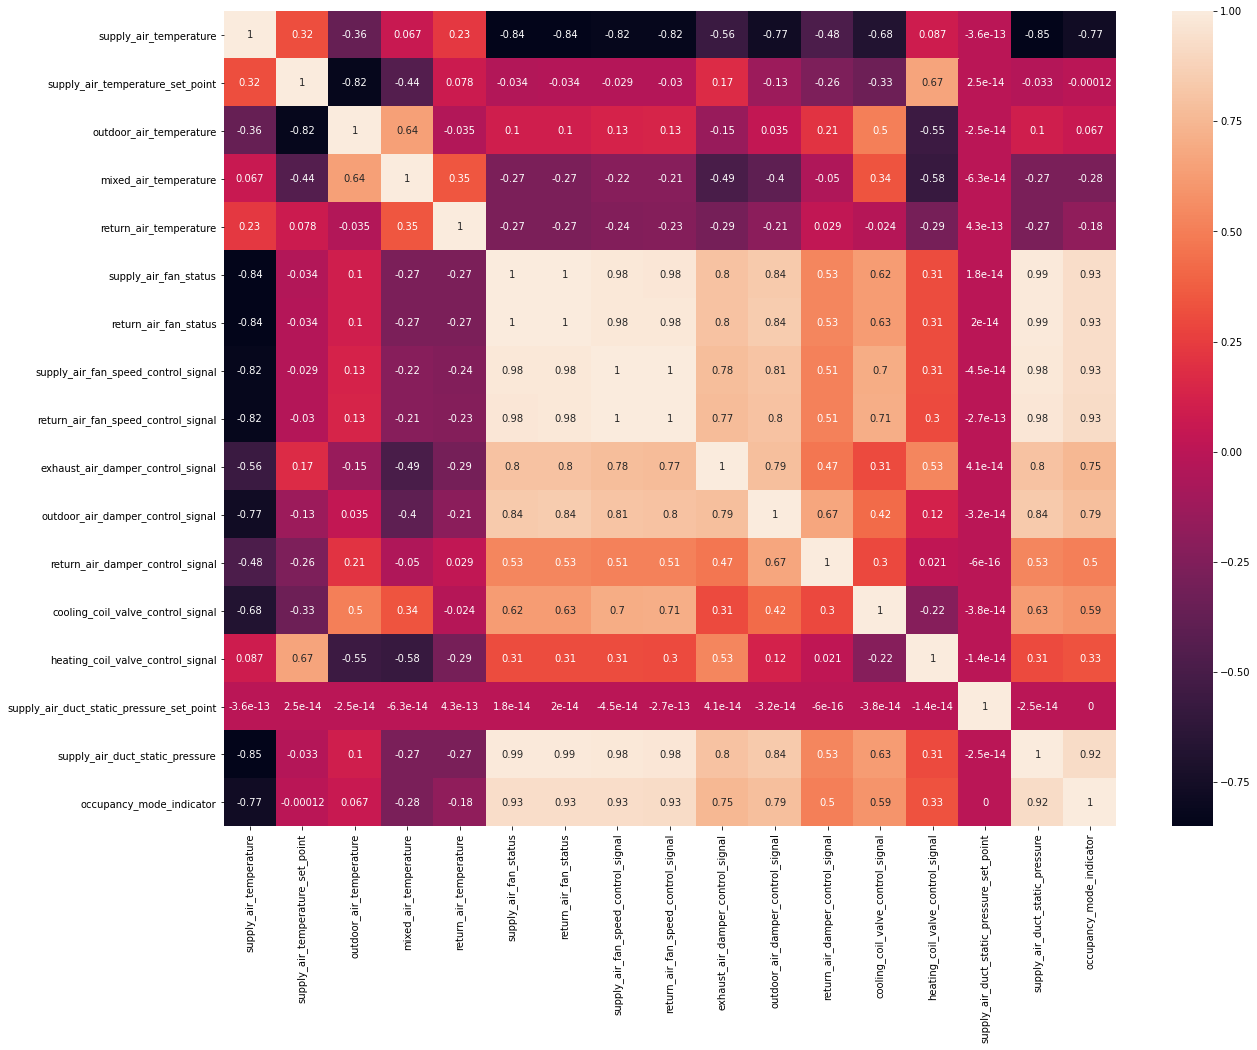

In [ ]:
# plot of correlation between the different fields present in the data
plt.figure(figsize=(20,15))
sns.heatmap(bivariate_plot_data.corr(), annot=True)

From the correlation plot above, there is evidence that multicollinearity in the data. However, this is not an issue since the task at hand is classification and hence the models I will use will not be affected. 

# **Handling Class Imbalance using SMOTE**


In [ ]:
# check the distribution of the target variable
data['fault_detection_ground_truth'].value_counts()

0    18720
1     2880
Name: fault_detection_ground_truth, dtype: int64

>There is a huge class imbalance which needs to be handled before modelling. I will use Synthetic Minority Oversampling Technique(SMOTE) to balance the data. 

**Splitting the data into features and labels**

In [ ]:
# Splitting our dataset into features and labels 
#
X = bivariate_plot_data.values #features
y = data['fault_detection_ground_truth'].values #labels

# feature scaling
X = StandardScaler().fit_transform(X)

**Handling Class Imbalance using SMOTE**



In [ ]:
# import library tO handle class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictors and target variable
x_smote, y_smote = smote.fit_resample(X, y)

# check the distribution of the classes before and after resampling
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 18720, 1: 2880})
Resample dataset shape Counter({1: 18720, 0: 18720})


**Splitting the data into train and test sets**

In [ ]:
# splitting the data into train and test sets by the 70-30% rule
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state=25)

# **Building Machine Learning Models**

## **KNN Classification**

In [ ]:
# modeling with 10 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# fitting the train sets onto the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# predicting using our built model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_knn = knn_classifier.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred_knn)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_knn))
print(knn_cm)
print(classification_report(y_test, y_pred_knn))


0.9962606837606838
[[5561   39]
 [   3 5629]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5600
           1       0.99      1.00      1.00      5632

    accuracy                           1.00     11232
   macro avg       1.00      1.00      1.00     11232
weighted avg       1.00      1.00      1.00     11232



>The KNN Classifier performs better than the Logistic Regression model. It is more powerful with an accuracy of 100%. This is a clear sign of overfitting. More values are classified correctly as shown in the confusion matrix 

## **Random Forest Classification**

<font color = "green"> Fitting the model

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Let's now build the model
forest = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_split=20)
# training the model using the training data
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_rand = forest.predict(X_test)

# compare the actual data and predicted data on a dataframe
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rand})
# summary statistics of the comparison dataframe
comparison_frame.describe()

,Actual,Predicted
count,11232.000000,11232.000000
mean,0.501425,0.526531
std,0.500020,0.499318
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


The mean and standard deviation values do not differ between the actual and the predicted values.

<font color='green'>Model Performance and Evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print('Random Forest accuracy:', accuracy_score(y_test,y_pred_rand))

# For further evaluation check the confusion matrix
random_cm = confusion_matrix(y_test, y_pred_rand)
print(random_cm)

print(classification_report(y_test, y_pred_rand))


Random Forest accuracy: 0.9748931623931624
[[5318  282]
 [   0 5632]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5600
           1       0.95      1.00      0.98      5632

    accuracy                           0.97     11232
   macro avg       0.98      0.97      0.97     11232
weighted avg       0.98      0.97      0.97     11232



The Random Forest Classifier performs poorly than the KNN Classifier. It has an accuracy of 97% with a few of the values misclassified.

## **Gradient Boosting Classifier**

In [ ]:
# importing library
from sklearn.ensemble import GradientBoostingClassifier

# building the model
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.2, max_depth=5, min_samples_split=20)
# training the model
gbc = gbc.fit (X_train, y_train)

# making predictions using the trained model
y_pred_gbc = gbc.predict(X_test)

# predicting using our built model
gbc_cm = confusion_matrix(y_test, y_pred_gbc)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_gbc))
print(gbc_cm)
print(classification_report(y_test, y_pred_gbc))


0.9988425925925926
[[5587   13]
 [   0 5632]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5600
           1       1.00      1.00      1.00      5632

    accuracy                           1.00     11232
   macro avg       1.00      1.00      1.00     11232
weighted avg       1.00      1.00      1.00     11232



The gradient boosting classifier performs well with an accuracy of 100%. It performs better than the Random Forest. However, like the KNN Classifier, this is a sign of overfitting which is undesirable. 

## **Support Vector Machine**

In [ ]:
# Building the model 
from sklearn.svm import SVC

rbf = SVC(kernel='rbf', gamma=4, C=10)
# Training the model using the training set
rbf.fit(X_train, y_train)

# making predictions using the trained model
y_pred_rbf = rbf.predict(X_test)

# predicting using our built model
rbf_cm = confusion_matrix(y_test, y_pred_rbf)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_rbf))
print(rbf_cm)
print(classification_report(y_test, y_pred_rbf))

0.9986645299145299
[[5591    9]
 [   6 5626]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5600
           1       1.00      1.00      1.00      5632

    accuracy                           1.00     11232
   macro avg       1.00      1.00      1.00     11232
weighted avg       1.00      1.00      1.00     11232



# **Dataset 2**

In [ ]:
# read data"
simulated = pd.read_csv("MZVAV-2-2.csv")
simulated.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1


In [ ]:
simulated.shape

(37440, 19)

## Data Cleaning

In [ ]:
# check for null values
simulated.isnull().sum()

Datetime                                          0
AHU: Supply Air Temperature                       0
AHU: Supply Air Temperature Set Point             0
AHU: Outdoor Air Temperature                      0
AHU: Mixed Air Temperature                        0
AHU: Return Air Temperature                       0
AHU: Supply Air Fan Status                        0
AHU: Return Air Fan Status                        0
AHU: Supply Air Fan Speed Control Signal          0
AHU: Return Air Fan Speed Control Signal          0
AHU: Exhaust Air Damper Control Signal            0
AHU: Outdoor Air Damper Control Signal            0
AHU: Return Air Damper Control Signal             0
AHU: Cooling Coil Valve Control Signal            0
AHU: Heating Coil Valve Control Signal            0
AHU: Supply Air Duct Static Pressure Set Point    0
AHU: Supply Air Duct Static Pressure              0
Occupancy Mode Indicator                          0
Fault Detection Ground Truth                      0
dtype: int64

In [ ]:
# check for duplicates
simulated.duplicated().sum()

0

In [ ]:
# fixing messy column names and ensuring they are in same format using strip(), lower(), replace() functions
simulated.columns = simulated.columns.str.strip().str.replace('AHU: ', '').str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# preview column names to see changes made
print(simulated.columns)

Index(['datetime', 'supply_air_temperature',
       'supply_air_temperature_set_point', 'outdoor_air_temperature',
       'mixed_air_temperature', 'return_air_temperature',
       'supply_air_fan_status', 'return_air_fan_status',
       'supply_air_fan_speed_control_signal',
       'return_air_fan_speed_control_signal',
       'exhaust_air_damper_control_signal',
       'outdoor_air_damper_control_signal', 'return_air_damper_control_signal',
       'cooling_coil_valve_control_signal',
       'heating_coil_valve_control_signal',
       'supply_air_duct_static_pressure_set_point',
       'supply_air_duct_static_pressure', 'occupancy_mode_indicator',
       'fault_detection_ground_truth'],
      dtype='object')


## EDA

1    18720
0    18720
Name: fault_detection_ground_truth, dtype: int64


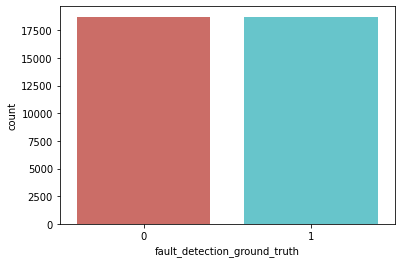

In [ ]:
# check the distribution of the target variable
print(simulated['fault_detection_ground_truth'].value_counts())

# plot the distribution of the target variable
sns.countplot(x='fault_detection_ground_truth',data=simulated, palette='hls')


For this dataset, the target variable is not imbalanced. The faulty and non-faulty units are equal


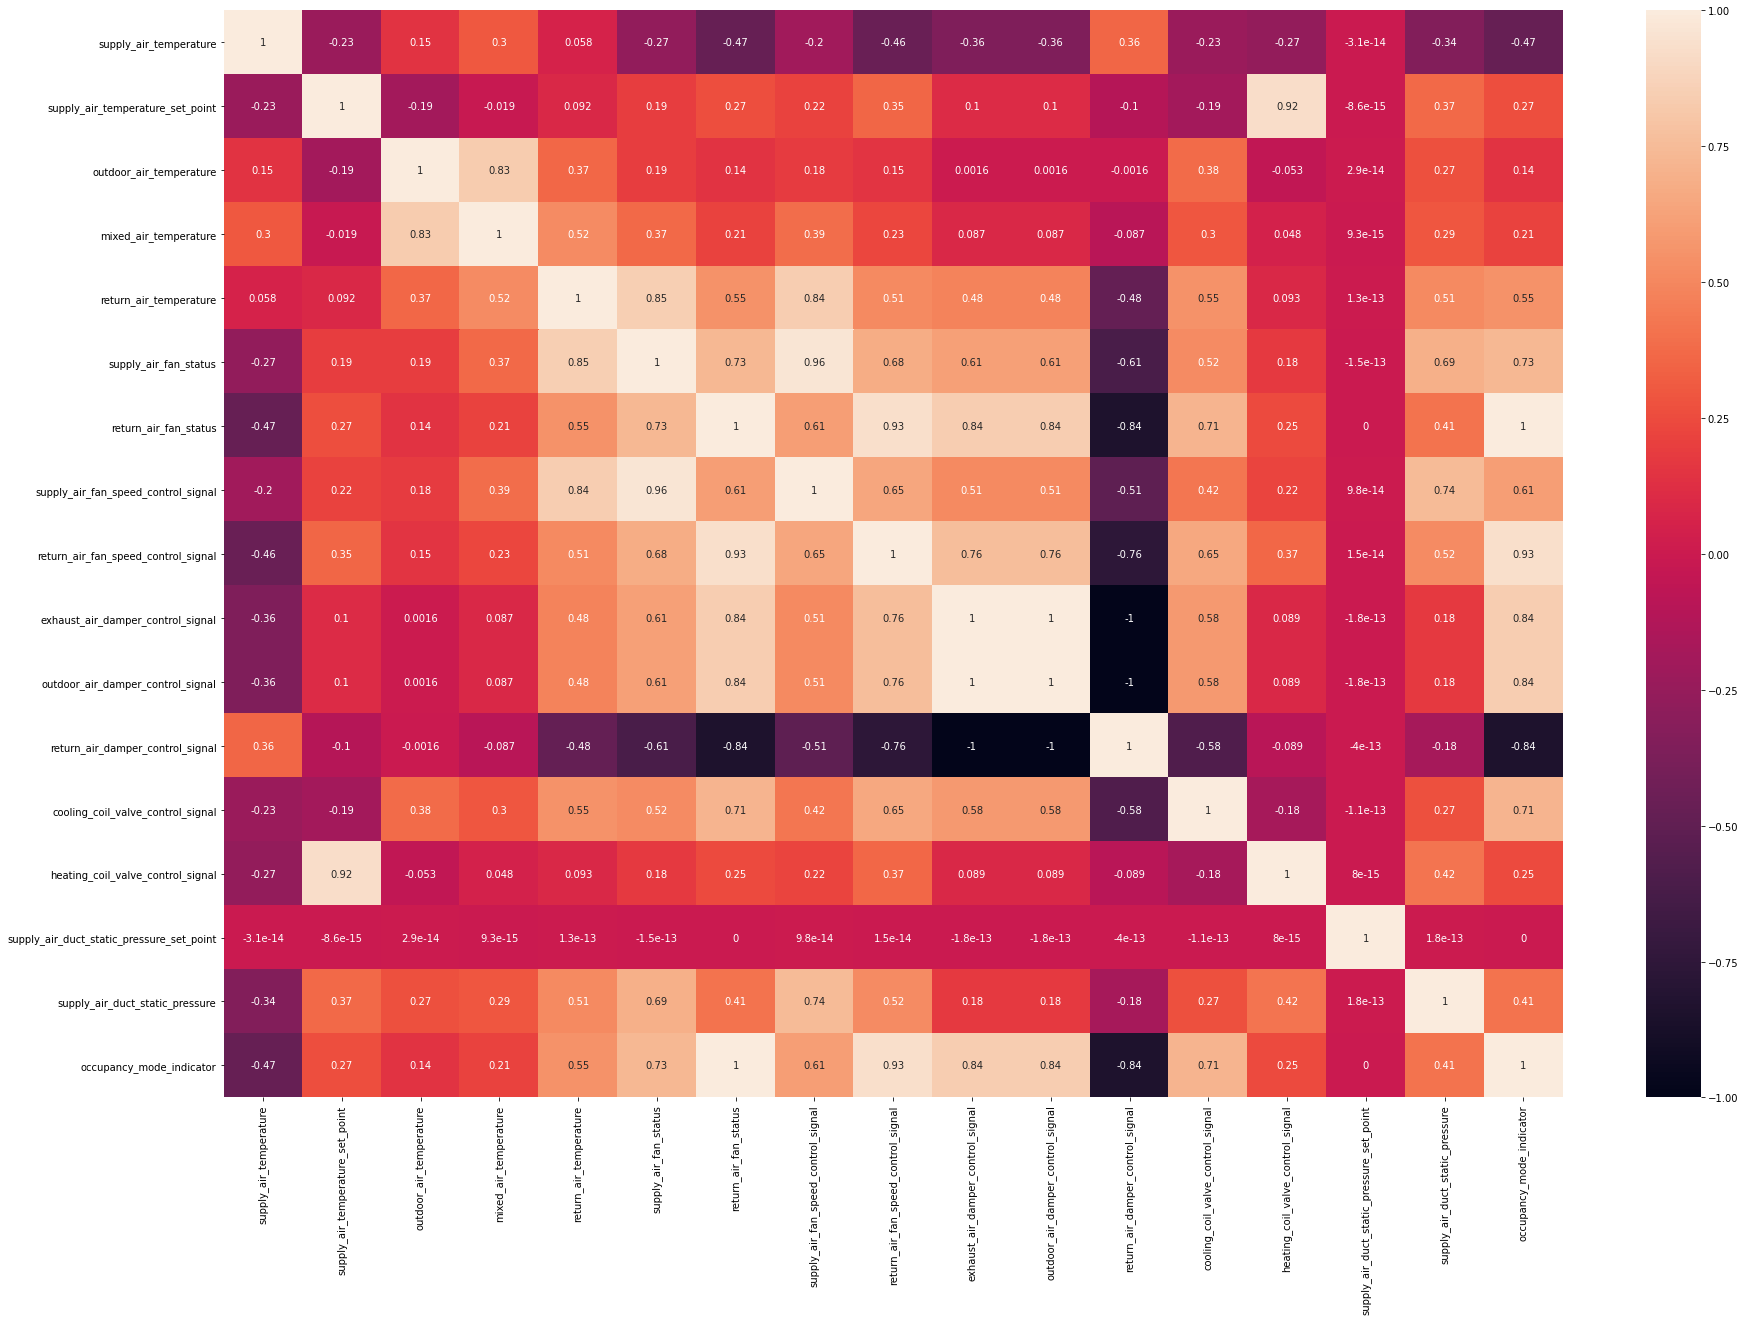

In [ ]:
# remove the target variable and the datetime column
simulated_bivariate = simulated.drop(['datetime', 'fault_detection_ground_truth'], axis=1)

# plot of correlation between the different fields present in the data
plt.figure(figsize=(30,20))
sns.heatmap(simulated_bivariate.corr(), annot=True)

## Modelling

### KNN Classification

In [ ]:
# Splitting our dataset into features and labels 
#
X = simulated.drop(['fault_detection_ground_truth', 'datetime'], axis=1).values #features
y = simulated['fault_detection_ground_truth'].values #labels

# feature scaling
X = StandardScaler().fit_transform(X)

# splitting the data into train and test sets by the 70-30% rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# modeling with 10 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn_sim = KNeighborsClassifier(n_neighbors=10)

# fitting the train sets onto the model
knn_sim.fit(X_train, y_train)

# predicting using our built model
y_pred_knn_sim = knn_sim.predict(X_test)
knn_cm_sim = confusion_matrix(y_test, y_pred_knn_sim)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_knn_sim))
print(knn_cm_sim)
print(classification_report(y_test, y_pred_knn_sim))


0.9580662393162394
[[5465  119]
 [ 352 5296]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5584
           1       0.98      0.94      0.96      5648

    accuracy                           0.96     11232
   macro avg       0.96      0.96      0.96     11232
weighted avg       0.96      0.96      0.96     11232



### Random Forest Classification

In [ ]:

# Let's now build the model
forest = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_split=20)
# training the model using the training data
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_rand_sim = forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Random Forest accuracy:', accuracy_score(y_test,y_pred_rand_sim))

# For further evaluation check the confusion matrix
random_cm_sim = confusion_matrix(y_test, y_pred_rand_sim)
print(random_cm_sim)

print(classification_report(y_test, y_pred_rand_sim))


Random Forest accuracy: 0.9116809116809117
[[5570   14]
 [ 978 4670]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5584
           1       1.00      0.83      0.90      5648

    accuracy                           0.91     11232
   macro avg       0.92      0.91      0.91     11232
weighted avg       0.92      0.91      0.91     11232



### Gradient Boosting Classifier

In [ ]:

# building the model
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.2, max_depth=5, min_samples_split=20)
# training the model
gbc = gbc.fit (X_train, y_train)

# making predictions using the trained model
y_pred_gbc_sim = gbc.predict(X_test)

# predicting using our built model
gbc_cm_sim = confusion_matrix(y_test, y_pred_gbc_sim)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_gbc_sim))
print(gbc_cm_sim)
print(classification_report(y_test, y_pred_gbc_sim))


0.9552172364672364
[[5455  129]
 [ 374 5274]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5584
           1       0.98      0.93      0.95      5648

    accuracy                           0.96     11232
   macro avg       0.96      0.96      0.96     11232
weighted avg       0.96      0.96      0.96     11232



### Support Vector Machine

In [ ]:
# Building the model 
from sklearn.svm import SVC

rbf = SVC(kernel='rbf', gamma=4, C=10)
# Training the model using the training set
rbf.fit(X_train, y_train)

# making predictions using the trained model
y_pred_rbf_sim = rbf.predict(X_test)

# predicting using our built model
rbf_cm_sim = confusion_matrix(y_test, y_pred_rbf_sim)
# model performance and evaluation

print(accuracy_score(y_test, y_pred_rbf_sim))
print(rbf_cm_sim)
print(classification_report(y_test, y_pred_rbf_sim))

0.9618055555555556
[[5464  120]
 [ 309 5339]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5584
           1       0.98      0.95      0.96      5648

    accuracy                           0.96     11232
   macro avg       0.96      0.96      0.96     11232
weighted avg       0.96      0.96      0.96     11232



The SVM model performs better for the second dataset which was simulated. 